In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Load Data

In [2]:
train_folder= './common/data/chest_xray/train/'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

Set up Training Folders

In [3]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Set up Testing Folders

In [4]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

234
normal picture title:  NORMAL2-IM-0246-0001-0002.jpeg
pneumonia picture title: person146_bacteria_704.jpeg


Text(0.5, 1.0, 'Pneumonia')

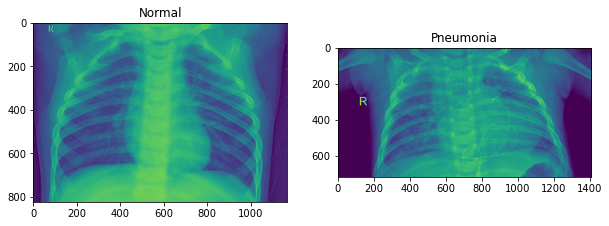

In [5]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

# plot images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

# Generate Dataset from image data

In [6]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/chest_xray/train/')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/') 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create/Load Model

In [7]:
from common.src import models

try:
    """
    with open('./common/models/baselineE20arch.json','r') as jtest:
        loaded_test = jtest.read()

    cnn = models.CNNModel(model = keras.models.model_from_json(loaded_test))
    cnn.model.load_weights('./common/models/baselineE20weights.hd5')
    """
    do_training = False
    cnn = models.CNNModel()
    cnn.from_json('./common/models/baselineE20arch.json','./common/models/baselineE20weights.hd5','./common/models/baselineE20history.pickle' )
except Exception as e:
    print(e)
    do_training = True
    cnn = models.CNNModel()
    cnn.create_model()
    cnn.summary()

[Errno 2] No such file or directory: './common/models/baselineE20arch.json'


# Fit Model

In [8]:
if do_training:
    cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 2)

Epoch 1/2
163/163 [==============================] - 492s 3s/step - loss: 0.4221 - tp: 4294.0000 - fp: 1163.0000 - tn: 4053.0000 - fn: 922.0000 - accuracy: 0.8001 - precision: 0.7869 - recall: 0.8232 - auc: 0.8869 - val_loss: 0.3922 - val_tp: 7488.0000 - val_fp: 2496.0000 - val_tn: 7488.0000 - val_fn: 2496.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.9141
Epoch 2/2
163/163 [==============================] - 475s 3s/step - loss: 0.2385 - tp: 4690.0000 - fp: 531.0000 - tn: 4685.0000 - fn: 526.0000 - accuracy: 0.8987 - precision: 0.8983 - recall: 0.8992 - auc: 0.9657 - val_loss: 0.8424 - val_tp: 6240.0000 - val_fp: 3744.0000 - val_tn: 6240.0000 - val_fn: 3744.0000 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250 - val_auc: 0.7754


# Save the Model

In [9]:
#keras.models.save_model(cnn.model, "./common/models/baselineE20.hd5", overwrite=True, include_optimizer=True)
"""
baseline_json = cnn.model.to_json()
with open ('./common/models/baselineE20archTEST1.json','w') as js:
    js.write(baseline_json)

cnn.model.save_weights('./common/models/baselineE20weightsTEST1.hd5')
"""
cnn.save_model('./common/models/baselineE2arch.json','./common/models/baselineE2weights.hd5','./common/models/baselineE2history.pickle')

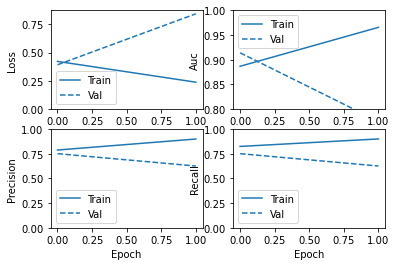

In [10]:
cnn.plot_history()

In [11]:
print(cnn.get_classification_report(test_set))

              precision    recall  f1-score   support

      NORMAL       0.33      0.14      0.20       234
   PNEUMONIA       0.62      0.83      0.71       390

    accuracy                           0.57       624
   macro avg       0.48      0.49      0.45       624
weighted avg       0.51      0.57      0.52       624

None


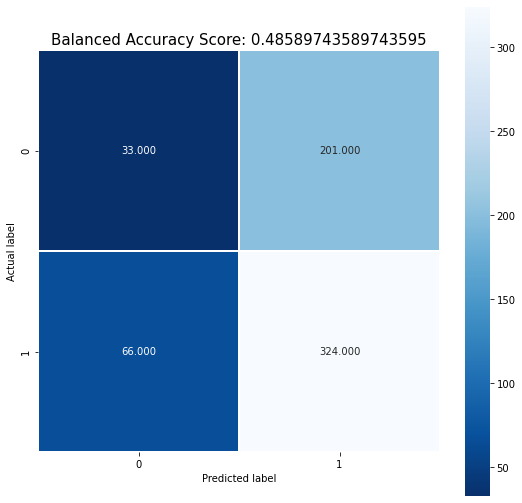

In [12]:
cnn.display_confusion_matrix(test_data_generator = test_set)